In [80]:
import sys
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

In [45]:
train_data_path = '../data/tox24_challenge_train.csv'
test_data_path = '../data/tox24_challenge_test.csv'
all_data_path = '../data/tox24_all.csv'
all_data_with_pc_data_path = '../data/tox24_alogps_oestate.csv'

df = pd.read_csv(all_data_with_pc_data_path)
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [53]:
# there is one duplicate in 
df[df['SMILES'].duplicated()]

,SMILES,N,ALogPS_logP,ALogPS_logS,HALOG,MW,N.1,NA,NH,O,...,Se1C2N2dd,Se1C2N==sd,SdddN,SdddN(nitro),Se2N3O1d,SddSi,Se2O1Si2d,Se1B3C3sa,Se1N3pO1a,SeaC2N3paa
813,COCCOCCO,814,-0.67,0.52,0,120.2,0,8,12,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df.query(f'SMILES == "COCCOCCO"')

,SMILES,N,ALogPS_logP,ALogPS_logS,HALOG,MW,N.1,NA,NH,O,...,Se1C2N2dd,Se1C2N==sd,SdddN,SdddN(nitro),Se2N3O1d,SddSi,Se2O1Si2d,Se1B3C3sa,Se1N3pO1a,SeaC2N3paa
752,COCCOCCO,753,-0.67,0.52,0,120.2,0,8,12,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813,COCCOCCO,814,-0.67,0.52,0,120.2,0,8,12,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df.drop_duplicates(subset=['SMILES'], inplace=True)

In [62]:
df_11 = pd.merge(df, df_train, on='SMILES')
df_12 = df[~df.index.isin(df_11.index)]
df_1 = pd.concat([df_11, df_12], axis=0)
PandasTools.AddMoleculeColumnToFrame(df_1, smilesCol='SMILES')

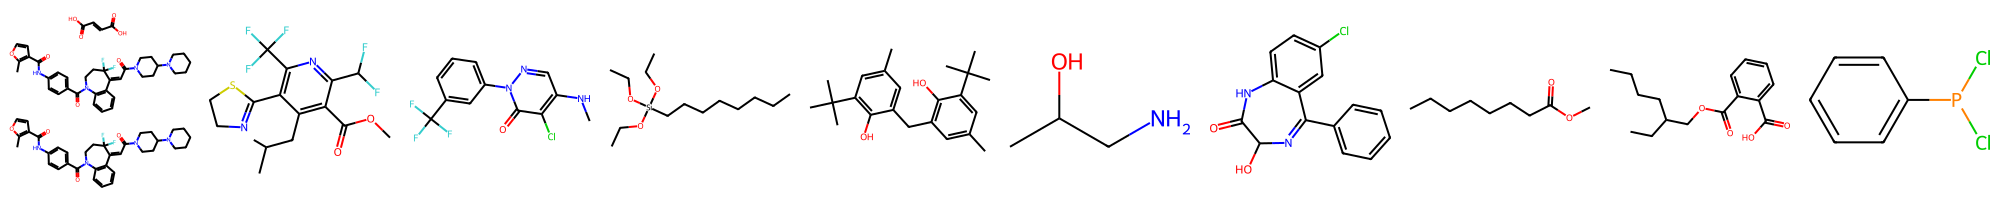

In [70]:
# visualize compounds
# tools: TMAP, UMAP,
n_sample = 10
Chem.Draw.MolsToImage(df_1.sample(n_sample)['ROMol'].to_list())

In [72]:
df_1['activity'].describe()

count    1012.000000
mean       40.813043
std        36.512641
min       -45.000000
25%        11.050000
50%        30.000000
75%        73.300000
max       111.100000
Name: activity, dtype: float64

In [77]:
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator(radius=2)
df_1['morgan_fp'] = df_1['ROMol'].apply(fpgen.GetFingerprint)

In [83]:
# to make it data
#df_1['morgan_fp'].apply(np.array).to_list()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
import torch

/home/ulamaca/projects/8_minal_pyhton_env/0_minimal_python3_env/minimal_ds/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
